In [22]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [23]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 5

START_DATE = "20240101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
EVENTS_DIR = BASE_DIR / "interm/events"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_FEATURES.pkl"

In [24]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 873 μs, sys: 9.99 ms, total: 10.9 ms
Wall time: 29.7 ms


In [25]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return',
       'close_log_fd_return', 'EMA_5', 'EMA_9', 'EMA_20', 'EMA_24', 'EMA_36',
       'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120', 'ADX_14',
       'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'unix_time', 'hour', 'dow', 'dom',
       'month', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'dom_sin',
       'dom_cos', 'month_sin',

In [26]:
columns = df.columns.to_list()

In [27]:
df.describe()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,close_log_fd_return,EMA_5,EMA_9,EMA_20,EMA_24,EMA_36,EMA_50,EMA_100,ATRr_14,ATRr_60,ATRr_120,ADX_14,ADXR_14_2,DMP_14,DMN_14,RSI_14,RSI_25,RSI_50,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0,BBL_10_2.0_2.0,BBM_10_2.0_2.0,BBU_10_2.0_2.0,BBB_10_2.0_2.0,BBP_10_2.0_2.0,BBL_15_2.0_2.0,BBM_15_2.0_2.0,BBU_15_2.0_2.0,BBB_15_2.0_2.0,BBP_15_2.0_2.0,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,MACD_8_17_9,MACDh_8_17_9,MACDs_8_17_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,unix_time,hour,dow,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
count,73782.000000,73782.000000,73782.000000,73782.000000,7.378200e+04,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,73782.000000,7.378200e+04,73782.000000,73782.000000,7.378200e+04,73782.000000,7.378200e+04,73782.000000,73782.000000,73782.000000,73782.000000,7.378200e+04,7.378200e+04,73782.000000,73782.000000,7.378200e+04,73782.000000,7.378200e+04,7.378200e+04
mean,151.554883,151.586910,151.522037,151.555031,2.866053e+12,0.008937,0.000001,0.000164,0.000001,2.809539,0.092988,151.554701,151.554371,151.553463,151.553133,151.552140,151.550974,151.546729,0.065086,0.065089,0.065097,24.905682,24.905795,0.198319,0.208983,50.970229,50.931168,50.881258,151.484670,151.554701,151.624733,0.093056,0.508530,151.450711,151.554288,151.657866,0.137632,0.510360,151.425207,151.553874,151.682542,0.170973,0.511852,151.403666,151.553461,151.703256,0.199047,0.513629,0.000743,5.427420e-07,0.000743,0.001155,3.874065e-07,0.001155,1.719979e+09,11.495446,2.043574,15.829579,6.549728,7.588506e-04,1.744560e-04,0.338148,-0.044358,-3.762773e-03,-0.033038,-1.070483e-02,-1.927249e-02
std,4.919621,4.913517,4.925606,4.919640,2.228322e+12,0.014872,0.000390,0.058596,0.000390,0.130422,0.000865,4.919264,4.918949,4.918130,4.917841,4.916983,4.915984,4.912340,0.043298,0.034811,0.031771,10.187962,10.135754,0.151234,0.186263,11.842608,9.059972,6.710240,4.932362,4.919406,4.907626,0.102772,0.287668,4.938667,4.919159,4.902005,0.145523,0.313370,4.943465,4.918917,4.897892,0.178151,0.324697,4.947487,4.918682,4.894520,0.204605,0.331555,0.052627,2.068860e-02,0.047271,0.065666,2.005542e-02,0.061719,8.948744e+06,6.922291,1.511753,8.702724,3.397226,7.072544e-01,7.069683e-01,0.528471,0.777444,7.155831e-01,0.697745,7.107397e-01,7.031191e-01
min,139.644000,139.704000,139.580500,139.643000,0.000000e+00,0.001819,-0.013773,-2.217000,-0.013869,0.562493,0.078977,139.702630,139.751402,139.831901,139.850704,139.891631,139.942875,140.074228,0.007240,0.014896,0.018331,5.343617,5.532091,0.013027,0.009565,5.059723,7.407503,11.237798,139.585436,139.692600,139.760064,0.000527,-0.000002,139.584376,139.755000,139.910258,0.001704,-0.248349,139.554375,139.769833,139.918187,0.006780,-0.430834,139.549782,139.790700,139.942696,0.010085,-0.582429,-0.957186,-4.108509e-01,-0.738812,-0.938841,-3.917211e-01,-0.804907,1.704425e+09,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,-0.781831,-0.900969,-9.987165e-01,-0.994869,-1.000000e+00,-1.000000e+00
25%,147.882500,147.913500,147.852125,147.882625,1.236530e+12,0.005327,-0.000137,-0.020500,-0.000137,2.736197,0.092513,147.880919,147.881089,147.881897,147.880563,147.880412,147.883069,147.906897,0.036813,0.041372,0.042971,17.253680,17.296242,0.103961,0.099302,42.967602,45.047648,46.651597,147.818067,147.882400,147.942822,0.038743,0.245816,147.788

In [28]:
scaler = StandardScaler()

In [29]:
df[columns] = scaler.fit_transform(df[columns])

In [30]:
df.describe()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,close_log_fd_return,EMA_5,EMA_9,EMA_20,EMA_24,EMA_36,EMA_50,EMA_100,ATRr_14,ATRr_60,ATRr_120,ADX_14,ADXR_14_2,DMP_14,DMN_14,RSI_14,RSI_25,RSI_50,BBL_5_2.0_2.0,BBM_5_2.0_2.0,BBU_5_2.0_2.0,BBB_5_2.0_2.0,BBP_5_2.0_2.0,BBL_10_2.0_2.0,BBM_10_2.0_2.0,BBU_10_2.0_2.0,BBB_10_2.0_2.0,BBP_10_2.0_2.0,BBL_15_2.0_2.0,BBM_15_2.0_2.0,BBU_15_2.0_2.0,BBB_15_2.0_2.0,BBP_15_2.0_2.0,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,MACD_8_17_9,MACDh_8_17_9,MACDs_8_17_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,unix_time,hour,dow,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
count,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04,7.378200e+04
mean,4.406151e-15,1.173933e-16,-7.075477e-15,-4.844329e-15,-9.052481e-18,6.163391e-18,6.631928e-18,7.316770e-18,6.150037e-18,-8.835800e-17,-1.366092e-14,7.546206e-15,-6.912629e-16,-5.577869e-15,7.873733e-16,-3.441099e-15,-5.285108e-15,-7.846768e-16,-1.454175e-16,-9.505105e-17,3.462093e-17,4.117254e-16,1.072274e-16,-9.572517e-17,-1.625113e-16,8.667269e-19,-4.332672e-16,2.326680e-16,-1.474399e-15,-1.367888e-15,-1.282371e-15,1.011663e-16,-1.278422e-17,-6.593192e-15,-1.084757e-15,4.423678e-15,-6.300623e-17,2.230859e-16,6.238508e-16,-8.980254e-16,3.351248e-15,-6.336737e-17,-2.134315e-16,8.823280e-16,2.928381e-15,-7.767799e-16,-2.313679e-17,2.612219e-17,-5.778180e-19,-3.129847e-18,-3.948423e-18,-4.815150e-18,6.452300e-18,-1.540848e-18,-4.546079e-15,-1.001551e-17,1.300090e-16,-1.513883e-16,4.198810e-17,-4.208441e-17,7.800542e-18,-2.538547e-16,-4.661065e-17,4.766998e-18,4.815150e-18,-1.969381e-16,6.683428e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.421114e+00,-2.418429e+00,-2.424396e+00,-2.421338e+00,-1.286202e+00,-4.786411e-01,-3.535296e+01,-3.783852e+01,-3.558413e+01,-1.722919e+01,-1.620069e+01,-2.409334e+00,-2.399506e+00,-2.383353e+00,-2.379603e+00,-2.371492e+00,-2.361313e+00,-2.335461e+00,-1.336018e+00,-1.441845e+00,-1.471966e+00,-1.920129e+00,-1.911435e+00,-1.225205e+00,-1.070628e+00,-3.876749e+00,-4.803984e+00,-5.907945e+00,-2.412498e+00,-2.411304e+00,-2.417615e+00,-9.003338e-01,-1.767786e+00,-2.402757e+00,-2.398655e+00,-2.396507e+00,-9.340702e-01,-2.421147e+00,-2.401335e+00,-2.395674e+00,-2.401939e+00,-9.216607e-01,-2.903301e+00,-2.395957e+

<Axes: xlabel='timestamp'>

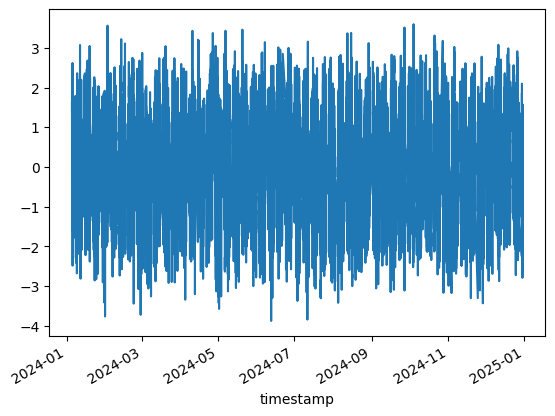

In [31]:
df['RSI_14'].plot()

In [36]:
NORMALIZED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_NORM.pkl"
print(NORMALIZED_FILE_PATH)

../data/processed/USDJPY-5m-20240101-20241231_NORM.pkl


In [33]:
df.to_pickle(NORMALIZED_FILE_PATH)